In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

In [40]:
class MovAvgFilter():
    '''
    Recursive form of moving average filter
    '''
    def __init__(self, n: int=10):
        self.n = n # the number of sample
        self.k = 0
    
    def update(self, x):
        '''
        Args:
            x: new sample point
        '''
        if self.k==0:
            self.xbuf = x * np.ones(self.n+1)
            self.prevAvg = x
        
        else:
            self.k += 1
            self.xbuf[:self.n] = self.xbuf[1:]
            self.xbuf[self.n] = x
            avg = self.preAvg + (x - self.xbuf[0]) / self.n
            self.preAvg = avg
            
            return avg
    
    def init_memory(self):
        '''
        initialize previously saved values
        '''
        self.k = 0
        self.preAvg = 0

In [41]:
class MovAvgFilter2():
    '''
    Batch form of moving average filter
    '''
    def __init__(self, n: int=10):
        self.n = n
        self.k = 0
    
    def update(self, x):
        '''
        Args:
            x: new sample point
        '''
        if self.k==0:
            self.xbuf = x * np.ones(self.n)
        else:
            self.xbuf[:self.n-1] = self.xbuf[1:]
            self.xbuf[self.n-1] = x
        
        return np.sum(self.xbuf) / self.n
    
    def init_memory(self):
        '''
        initialize previously saved values
        '''
        self.k = 0

In [49]:
class GetSonar():
    def __init__(self):
        '''
        Load sonar data
        '''
        self.sonarAlt = io.loadmat('../source/2.MovAvgFilter/SonarAlt.mat')
        self.sonarAlt = self.sonarAlt['sonarAlt'].reshape(-1)
        self.n = 0
        
        
    def __len__(self):
        return len(self.sonarAlt)
    
    def getdata(self):
        # if all data is used, get data from first sample 
        if self.n < len(self):
            data = self.sonarAlt[self.n]
            self.n += 1
            return data
        
        else:
            self.n = 0
            return self.sonarAlt[self.n]
        

In [56]:
GetSonar().getdata(), GetSonar().n

(34.2549125576344, 0)

In [48]:
Nsamples = len(GetSonar())
t = np.arange(0, 0.2*len(GetSonar()), 0.2)

# container for filtered data
Xsaved = np.zeros(Nsamples)
Xsaved2 = np.zeros(Nsamples)

# container for measured data
Xmsaved = np.zeros(Nsamples)

mov_avg = MovAvgFilter()
mov_avg2 = MovAvgFilter2()

for idx in range(Nsamples):
    xm = GetSonar().getdata()
    
    x1 = mov_avg.update(xm)
    x2 = mov_avg2.update(xm)
    print(xm, x1, x2)
    
    Xmsaved[idx] = xm
    Xsaved[idx] = x1
    Xsaved2[idx] = x2

34.2549125576344 None 34.2549125576344
34.2549125576344 None 34.2549125576344
34.2549125576344 None 34.2549125576344
34.2549125576344 None 34.2549125576344
34.2549125576344 None 34.2549125576344
34.2549125576344 None 34.2549125576344
34.2549125576344 None 34.2549125576344
34.2549125576344 None 34.2549125576344
34.2549125576344 None 34.2549125576344
34.2549125576344 None 34.2549125576344
34.2549125576344 None 34.2549125576344
34.2549125576344 None 34.2549125576344
34.2549125576344 None 34.2549125576344
34.2549125576344 None 34.2549125576344
34.2549125576344 None 34.2549125576344
34.2549125576344 None 34.2549125576344
34.2549125576344 None 34.2549125576344
34.2549125576344 None 34.2549125576344
34.2549125576344 None 34.2549125576344
34.2549125576344 None 34.2549125576344
34.2549125576344 None 34.2549125576344
34.2549125576344 None 34.2549125576344
34.2549125576344 None 34.2549125576344
34.2549125576344 None 34.2549125576344
34.2549125576344 None 34.2549125576344
34.2549125576344 None 34.

Text(0, 0.5, 'Altitude [m]')

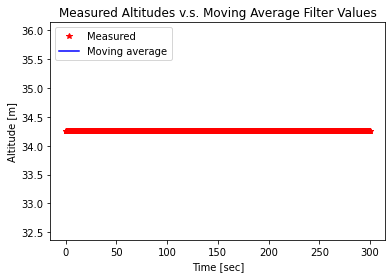

In [47]:
plt.plot(t, Xmsaved, 'r*', label='Measured')
plt.plot(t, Xsaved, 'b-', label='Moving average')
plt.legend(loc='upper left')
plt.title('Measured Altitudes v.s. Moving Average Filter Values')
plt.xlabel('Time [sec]')
plt.ylabel('Altitude [m]')